# Demo TECxTMS_2F (total electron content)

> Authors: Ashley Smith
>
> Abstract: Access to the total electric contents (level 2 product).

In [1]:
# %load_ext watermark
# %watermark -i -v -p viresclient,pandas,xarray,matplotlib

In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

request = SwarmRequest()

## TECxTMS_2F product information

Derived total electron content (TEC) 

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#TECxTMS_2F

### Check what "TEC" data variables are available

In [3]:
request.available_collections("IPD", details=False)

{'IPD': ['SW_OPER_IPDAIRR_2F', 'SW_OPER_IPDBIRR_2F', 'SW_OPER_IPDCIRR_2F']}

In [4]:
request.available_measurements("TEC")

['GPS_Position',
 'LEO_Position',
 'PRN',
 'L1',
 'L2',
 'P1',
 'P2',
 'S1',
 'S2',
 'Elevation_Angle',
 'Absolute_VTEC',
 'Absolute_STEC',
 'Relative_STEC',
 'Relative_STEC_RMS',
 'DCB',
 'DCB_Error']

## Fetch one day of TEC data

In [5]:
request.set_collection("SW_OPER_TECATMS_2F")
request.set_products(measurements=request.available_measurements("TEC"))
data = request.get_between(dt.datetime(2014,1,1),
                           dt.datetime(2014,1,2))

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:04, Remaining: 00:00 ] (9.311MB)


### Loading as pandas

In [6]:
df = data.as_dataframe()
df.head()

,S1,Elevation_Angle,LEO_Position,Latitude,P1,Radius,PRN,DCB_Error,Relative_STEC_RMS,L1,Absolute_STEC,S2,P2,DCB,L2,GPS_Position,Relative_STEC,Absolute_VTEC,Longitude,Spacecraft
2014-01-01 00:00:04,36.83,39.683333,"[6668214.544000001, -1677732.674, -177943.9959...",-1.482419,2.182913e+07,6.878338e+06,15,0.832346,0.555675,-6.261986e+06,16.429938,36.83,2.182914e+07,-11.446853,-6.261989e+06,"[22448765.690377887, 5421379.431197803, -13409...",24.041127,10.894886,-14.122572,A
2014-01-01 00:00:04,34.75,37.478137,"[6668214.544000001, -1677732.674, -177943.9959...",-1.482419,2.135749e+07,6.878338e+06,18,0.832346,0.488000,-1.466568e+07,16.456409,34.75,2.135749e+07,-11.446853,-1.466568e+07,"[16113499.491062254, -16306172.004347403, -126...",22.754795,10.461554,-14.122572,A
2014-01-01 00:00:04,30.90,24.681787,"[6668214.544000001, -1677732.674, -177943.9959...",-1.482419,2.277638e+07,6.878338e+06,22,0.832346,1.313984,-5.455452e+06,20.434286,30.90,2.277638e+07,-11.446853,-5.455454e+06,"[10823457.339250825, -24014739.352816023, -248...",15.585271,9.529846,-14.122572,A
2014-01-01 00:00:04,29.87,24.647445,"[6668214.544000001, -1677732.674, -177943.9959...",-1.482419,2.298846e+07,6.878338e+06,24,0.832346,0.899036,-3.402816e+06,20.085094,29.87,2.298847e+07,-11.446853,-3.402821e+06,"[20631539.59055339, 13441368.439225309, 100505...",52.291341,9.357587,-14.122572,A
2014-01-01 00:00:04,30.88,30.753636,"[6668214.544000001, -1677732.674, -177943.9959...",-1.482419,2.229899e+07,6.878338e+06,25,0.832346,0.546729,-2.285981e+06,15.676947,30.88,2.229900e+07,-11.446853,-2.285986e+06,"[16637723.905075422, -10692759.977004562, 1761...",52.672067,8.597559,-14.122572,A


NB: The time interval is not always the same:

In [7]:
times = df.index
np.unique(np.sort(np.diff(times.to_pydatetime())))

array([datetime.timedelta(0), datetime.timedelta(seconds=10)],
      dtype=object)

In [8]:
len(df), 60*60*24

(49738, 86400)

## Loading and plotting as xarray

In [9]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:            (Timestamp: 49738, WGS84: 3)
Coordinates:
  * Timestamp          (Timestamp) datetime64[ns] 2014-01-01T00:00:04 ... 2014-01-01T23:59:54
  * WGS84              (WGS84) <U1 'X' 'Y' 'Z'
Data variables:
    Spacecraft         (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Latitude           (Timestamp) float64 -1.482 -1.482 -1.482 ... -81.7 -81.7
    P1                 (Timestamp) float64 2.183e+07 2.136e+07 ... 2.171e+07
    PRN                (Timestamp) uint16 15 18 22 24 25 29 ... 7 15 16 18 21 26
    DCB_Error          (Timestamp) float64 0.8323 0.8323 ... 0.8323 0.8323
    Relative_STEC_RMS  (Timestamp) float64 0.5557 0.488 1.314 ... 0.6458 3.041
    Absolute_STEC      (Timestamp) float64 16.43 16.46 20.43 ... 10.77 10.78
    S2                 (Timestamp) float64 36.83 34.75 30.9 ... 23.03 37.73 37.5
    P2                 (Timestamp) float64 2.183e+07 2.136e+07 ... 2.171e+07
    DCB                (Timestamp) float64 -11.45 -11.45 ... -11.45 -11.45
    L2                 (Timestamp) float64 -6.262e+06 -1.467e+07 ... -3.41e+06
    GPS_Position       (Timestamp, WGS84) float64 2.245e+07 ... -2.111e+07
    Longitude          (Timestamp) float64 -14.12 -14.12 -14.12 ... 1.559 1.559
    S1                 (Timestamp) float64 36.83 34.75 30.9 ... 23.03 37.73 37.5
    Elevation_Angle    (Timestamp) float64 39.68 37.48 24.68 ... 49.64 45.71
    LEO_Position       (Timestamp, WGS84) float64 6.668e+06 ... -6.808e+06
    Radius             (Timestamp) float64 6.878e+06 6.878e+06 ... 6.88e+06
    L1                 (Timestamp) float64 -6.262e+06 -1.467e+07 ... -3.41e+06
    Relative_STEC      (Timestamp) float64 24.04 22.75 15.59 ... 16.92 26.51
    Absolute_VTEC      (Timestamp) float64 10.89 10.46 9.53 ... 8.365 7.912
Attributes:
    Sources:         ['SW_OPER_TECATMS_2F_20140101T000000_20140101T235959_0301']
    MagneticModels:  []
    RangeFilters:    []

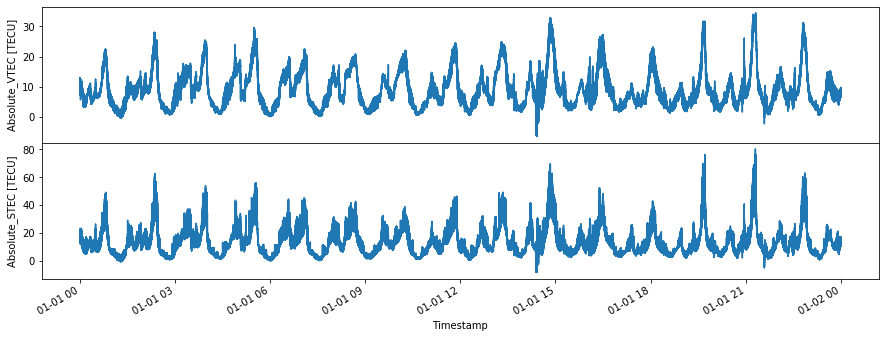

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,5), sharex=True)
ds["Absolute_VTEC"].plot.line(x="Timestamp", ax=axes[0])
ds["Absolute_STEC"].plot.line(x="Timestamp", ax=axes[1]);
fig.subplots_adjust(hspace=0)